### Loading and Inspecting the Data

In [1]:
import pandas as pd
filename = "files/002.csv"
df_all_data = pd.read_csv(filename)

In [2]:
df_all_data

,x,y
0,1846,21
1,1864,26
2,792,39
3,1281,23
4,522,44
5,1488,27
6,1061,25
7,1817,22
8,1914,28
9,1731,21


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

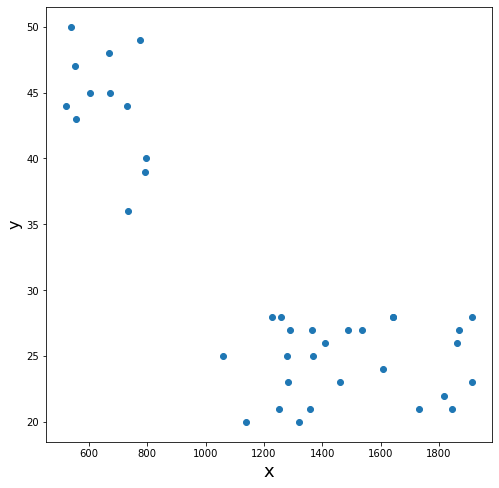

In [4]:
plt.rcParams["figure.figsize"] = (8,8) 
plt.scatter(df_all_data.x, df_all_data.y)
plt.xlabel('x', fontsize=18) 
plt.ylabel('y', fontsize=16) 

### Training and Deploying a K-Means model

In [5]:
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session()
role = get_execution_role()
bucket = session.default_bucket()

In [6]:
from sagemaker import KMeans

estimator = KMeans(role=role,
                   instance_count=1,
                   instance_type='ml.m5.xlarge',
                   k=2)

In [7]:
data_np = df_all_data.values.astype('float32')
record_set = estimator.record_set(data_np)

In [8]:
estimator.fit(record_set)

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-05-08 05:38:26 Starting - Starting the training job...
2021-05-08 05:38:49 Starting - Launching requested ML instancesProfilerReport-1620452306: InProgress
......
2021-05-08 05:39:49 Starting - Preparing the instances for training......
2021-05-08 05:40:50 Downloading - Downloading input data...
2021-05-08 05:41:27 Training - Training image download completed. Training in progress.
2021-05-08 05:41:27 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/08/2021 05:41:24 INFO 139873916823360] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 

In [9]:
predictor = estimator.deploy(initial_instance_count=1,
                             instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-------------------!

In [10]:
results = predictor.predict(data_np)
results

[label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 347.3273010253906
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 365.30706787109375
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 76.07910919189453
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 0.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 217.70220947265625
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 lab

In [11]:
predictor.delete_endpoint()

### Exercise # 1

**INSTRUCTION**: Prepare a DataFrame with the following columns

- x
- y
- closest_cluster



In [91]:
closest_cluster = [row.label['closest_cluster'].float32_tensor.values[0] for row in results]

In [92]:
output = df_all_data[['x','y']]
output["closest_cluster"] = closest_cluster
output

,x,y,closest_cluster
0,1846,21,0.0
1,1864,26,0.0
2,792,39,1.0
3,1281,23,0.0
4,522,44,1.0
5,1488,27,0.0
6,1061,25,1.0
7,1817,22,0.0
8,1914,28,0.0
9,1731,21,0.0


### Exercise # 2

**INSTRUCTION**: Using the DataFrame from `Exercise # 1`, generate a scatter plot using `matplotlib` with the points from 1 cluster colored differently from the points in the 2nd cluster

Text(0, 0.5, 'y')

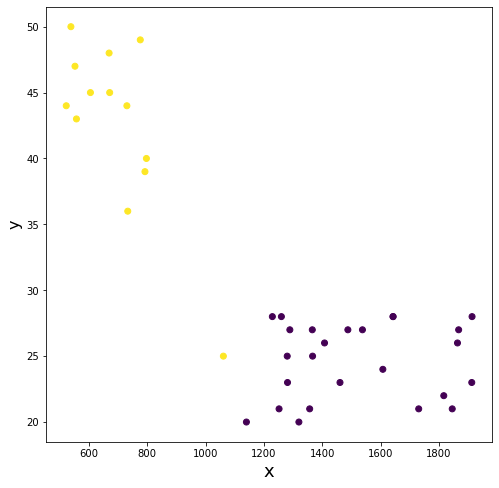

In [93]:
plt.rcParams["figure.figsize"] = (8,8) 
plt.scatter(output.x, output.y, c=output.closest_cluster)
plt.xlabel('x', fontsize=18) 
plt.ylabel('y', fontsize=16) 